In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# load and summarize the dataset
from matplotlib import pyplot
from pandas import read_csv
import seaborn as sns
# filename = "xAPI-Edu-Data.csv"
filename = '/gdrive/My Drive/Colab Notebooks/CSE704 Project/xAPI-Edu-Data.csv'
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
data = read_csv(filename, names=names)
data = data.drop(0)
print(data.shape)
print(data.head(10))

(480, 17)
   gender NationalITy  ... StudentAbsenceDays Class
1       M          KW  ...            Under-7     M
2       M          KW  ...            Under-7     M
3       M          KW  ...            Above-7     L
4       M          KW  ...            Above-7     L
5       M          KW  ...            Above-7     M
6       F          KW  ...            Above-7     M
7       M          KW  ...            Above-7     L
8       M          KW  ...            Under-7     M
9       F          KW  ...            Under-7     M
10      F          KW  ...            Under-7     M

[10 rows x 17 columns]


In [ ]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 480
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    object
 10  VisITedResources          480 non-null    object
 11  AnnouncementsView         480 non-null    object
 12  Discussion                480 non-null    object
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
print(data.describe())

       gender NationalITy  ... StudentAbsenceDays Class
count     480         480  ...                480   480
unique      2          14  ...                  2     3
top         M          KW  ...            Under-7     M
freq      305         179  ...                289   211

[4 rows x 17 columns]


In [ ]:
for i in range(1,17):
    print(data.iloc[:,i].value_counts())
    print("*"*30)

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
******************************
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
******************************
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
******************************
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
******************************
A    283
B    167
C     30
Name: SectionID,

In [ ]:
print("The Unique Values of Gender: ", data["gender"].unique())
print("The Unique Values of NationalITy: ", data["NationalITy"].unique())
print("The Unique Values of PlaceofBirth: ", data["PlaceofBirth"].unique())
print("The Unique Values of StageID: ", data["StageID"].unique())
print("The Unique Values of GradeID: ", data["GradeID"].unique())
print("The Unique Values of SectionID: ", data["SectionID"].unique())
print("The Unique Values of Topic: ", data["Topic"].unique())
print("The Unique Values of Semester: ", data["Semester"].unique())
print("The Unique Values of Relation: ", data["Relation"].unique()) 
print("The Unique Values of ParentAnsweringSurvey: ", data["ParentAnsweringSurvey"].unique())
print("The Unique Values of ParentschoolSatisfaction: ", data["ParentschoolSatisfaction"].unique())
print("The Unique Values of StudentAbsenceDays: ", data["StudentAbsenceDays"].unique())
print("The Unique Values of  Class: ", data["Class"].unique())

The Unique Values of Gender:  ['M' 'F']
The Unique Values of NationalITy:  ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
The Unique Values of PlaceofBirth:  ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
The Unique Values of StageID:  ['lowerlevel' 'MiddleSchool' 'HighSchool']
The Unique Values of GradeID:  ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
The Unique Values of SectionID:  ['A' 'B' 'C']
The Unique Values of Topic:  ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
The Unique Values of Semester:  ['F' 'S']
The Unique Values of Relation:  ['Father' 'Mum']
The Unique Values of ParentAnsweringSurvey:  ['Yes' 'No']
The Unique Values of ParentschoolSatisfaction:  ['Good' 'Bad']
The Unique Values of StudentAbsenceDays:  ['Under-7' 'A

In [ ]:
replace_map = {'gender': {'M': 1, 'F': 2}}
replace_map1 = {'NationalITy': {'Egypt': 1, 'Iran': 2, 'Iraq': 3, 'Jordan': 4, 'KW':5,'Lybia': 6, 
                'Morocco': 7, 'Palestine': 8 , 'SaudiArabia': 9 , 'Syria': 10,'Tunis': 11,
                'USA': 12,'lebanon': 13,'venzuela': 14}}
replace_map2 = {'PlaceofBirth': {'Egypt': 1, 'Iran': 2, 'Iraq': 3, 'Jordan': 4, 'KuwaIT':5,
                'Lybia': 6, 'Morocco': 7, 'Palestine': 8 , 'SaudiArabia': 9 , 'Syria': 10,
                'Tunis': 11,'USA': 12,'lebanon': 13,'venzuela': 14}}
replace_map3 = {'StageID': {'lowerlevel': 1, 'MiddleSchool': 2, 'HighSchool': 3 }}
replace_map4 = {'GradeID': {'G-02':1,'G-04':2, 'G-05':3,'G-06':4,'G-07':5,'G-08':6,
                            'G-09':7,'G-10':8,'G-11':9,'G-12':10}}
replace_map5 = {'SectionID': {'A': 1, 'B': 2, 'C': 3}}
replace_map6 = {'Topic': {'Arabic': 1, 'Biology': 2, 'Chemistry': 3, 'English': 4, 
                          'French':5,'Geology': 6, 'History': 7, 'IT': 8 , 'Math': 9 , 
                          'Quran': 10,'Science': 11,'Spanish': 12}}
replace_map7 = {'Semester': {'F': 1, 'S': 2}}
replace_map8 = {'Relation': {'Father': 1, 'Mum': 2}}
replace_map9 = {'ParentAnsweringSurvey': {'Yes': 1, 'No': 2}}
replace_map10 = {'ParentschoolSatisfaction': {'Bad': 1, 'Good': 2}}
replace_map11 = {'StudentAbsenceDays': {'Under-7': 1, 'Above-7': 2}}
replace_map12 = {'Class': {'L': 1,'M': 2,'H':3}}

In [ ]:
data.replace(replace_map,inplace=True)
data.replace(replace_map1,inplace=True)
data.replace(replace_map2,inplace=True)
data.replace(replace_map3,inplace=True)
data.replace(replace_map4,inplace=True)
data.replace(replace_map5,inplace=True)
data.replace(replace_map6,inplace=True)
data.replace(replace_map7,inplace=True)
data.replace(replace_map8,inplace=True)
data.replace(replace_map9,inplace=True)
data.replace(replace_map10,inplace=True)
data.replace(replace_map11,inplace=True)
data.replace(replace_map12,inplace=True)

In [ ]:
print("The Unique Values of SectionID: ", data["raisedhands"].unique())
print("The Unique Values of Topic: ", data["VisITedResources"].unique())
print("The Unique Values of Semester: ", data["AnnouncementsView"].unique())
print("The Unique Values of Relation: ", data["Discussion"].unique()) 

The Unique Values of SectionID:  ['15' '20' '10' '30' '40' '42' '35' '50' '12' '70' '19' '5' '62' '36' '55'
 '69' '60' '2' '0' '8' '25' '75' '4' '45' '14' '33' '7' '13' '29' '39'
 '49' '16' '28' '27' '21' '80' '17' '65' '22' '11' '1' '3' '100' '6' '90'
 '77' '24' '66' '23' '82' '72' '51' '85' '87' '95' '81' '53' '92' '83'
 '67' '96' '57' '73' '9' '32' '52' '59' '61' '79' '18' '74' '97' '41' '71'
 '98' '78' '89' '88' '86' '76' '99' '84']
The Unique Values of Topic:  ['16' '20' '7' '25' '50' '30' '12' '10' '21' '80' '88' '6' '1' '14' '70'
 '40' '13' '15' '60' '0' '2' '19' '85' '90' '5' '22' '11' '54' '35' '33'
 '4' '39' '75' '69' '3' '8' '89' '44' '92' '26' '27' '29' '98' '9' '42'
 '65' '79' '55' '63' '91' '51' '58' '68' '82' '72' '52' '62' '71' '66'
 '43' '95' '31' '41' '81' '61' '83' '84' '17' '94' '48' '86' '74' '76'
 '97' '87' '99' '34' '64' '28' '38' '36' '24' '59' '57' '77' '18' '93'
 '96' '78']
The Unique Values of Semester:  ['2' '3' '0' '5' '12' '13' '15' '16' '25' '30' '19' '44

In [ ]:
dataset = data
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1,1,5,5,1,2,1,8,1,1,15,16,2,20,1,2,1,2
2,1,5,5,1,2,1,8,1,1,20,20,3,25,1,2,1,2
3,1,5,5,1,2,1,8,1,1,10,7,0,30,2,1,2,1
4,1,5,5,1,2,1,8,1,1,30,25,5,35,2,1,2,1
5,1,5,5,1,2,1,8,1,1,40,50,12,50,2,1,2,2


In [ ]:
import pandas as pd
import numpy as np
#dataset = dataset.drop(0)
dataset = np.array(dataset, dtype = np.int)
df_new = pd.DataFrame(dataset)
df_new.columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
print(df_new)

     gender  NationalITy  ...  StudentAbsenceDays  Class
0         1            5  ...                   1      2
1         1            5  ...                   1      2
2         1            5  ...                   2      1
3         1            5  ...                   2      1
4         1            5  ...                   2      2
..      ...          ...  ...                 ...    ...
475       2            4  ...                   2      1
476       2            4  ...                   1      2
477       2            4  ...                   1      2
478       2            4  ...                   2      1
479       2            4  ...                   2      1

[480 rows x 17 columns]


In [ ]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    480 non-null    int64
 1   NationalITy               480 non-null    int64
 2   PlaceofBirth              480 non-null    int64
 3   StageID                   480 non-null    int64
 4   GradeID                   480 non-null    int64
 5   SectionID                 480 non-null    int64
 6   Topic                     480 non-null    int64
 7   Semester                  480 non-null    int64
 8   Relation                  480 non-null    int64
 9   raisedhands               480 non-null    int64
 10  VisITedResources          480 non-null    int64
 11  AnnouncementsView         480 non-null    int64
 12  Discussion                480 non-null    int64
 13  ParentAnsweringSurvey     480 non-null    int64
 14  ParentschoolSatisfaction  480 non-null    

In [ ]:
dataset = df_new 
print(dataset.head())

   gender  NationalITy  ...  StudentAbsenceDays  Class
0       1            5  ...                   1      2
1       1            5  ...                   1      2
2       1            5  ...                   2      1
3       1            5  ...                   2      1
4       1            5  ...                   2      2

[5 rows x 17 columns]


In [ ]:
print(dataset.describe())

           gender  NationalITy  ...  StudentAbsenceDays       Class
count  480.000000   480.000000  ...          480.000000  480.000000
mean     1.364583     5.345833  ...            1.397917    2.031250
std      0.481815     2.469265  ...            0.489979    0.748738
min      1.000000     1.000000  ...            1.000000    1.000000
25%      1.000000     4.000000  ...            1.000000    1.000000
50%      1.000000     5.000000  ...            1.000000    2.000000
75%      2.000000     5.000000  ...            2.000000    3.000000
max      2.000000    14.000000  ...            2.000000    3.000000

[8 rows x 17 columns]


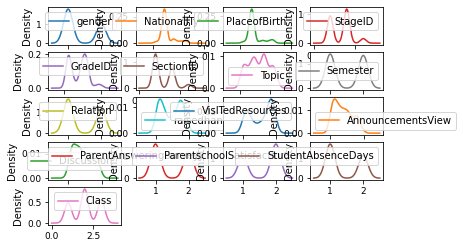

In [ ]:
df = dataset[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays','Class']]
#scatter_matrix(df_new,alpha=0.5,figsize=(9,9));
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False,fontsize=9) 
pyplot.rcParams["figure.figsize"] = 17,17
pyplot.show()

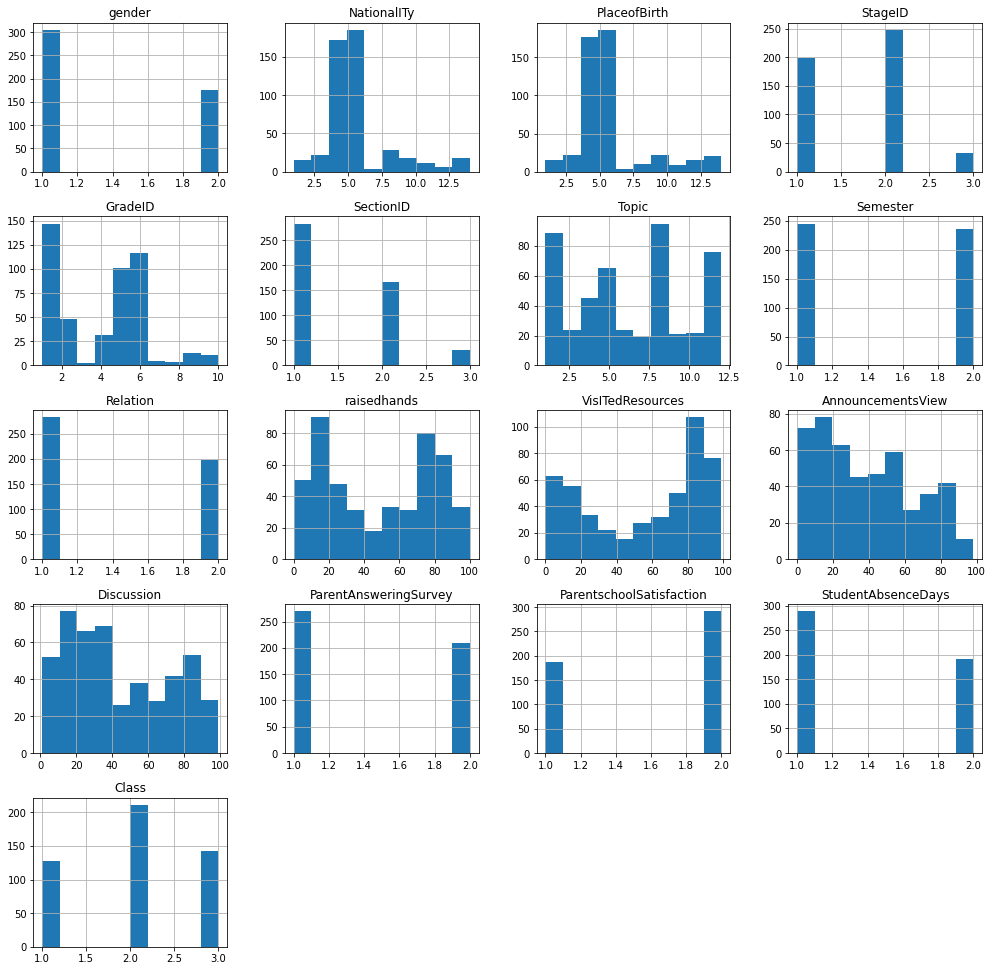

In [ ]:
df.hist()
pyplot.rcParams["figure.figsize"] = 10,15
pyplot.show()

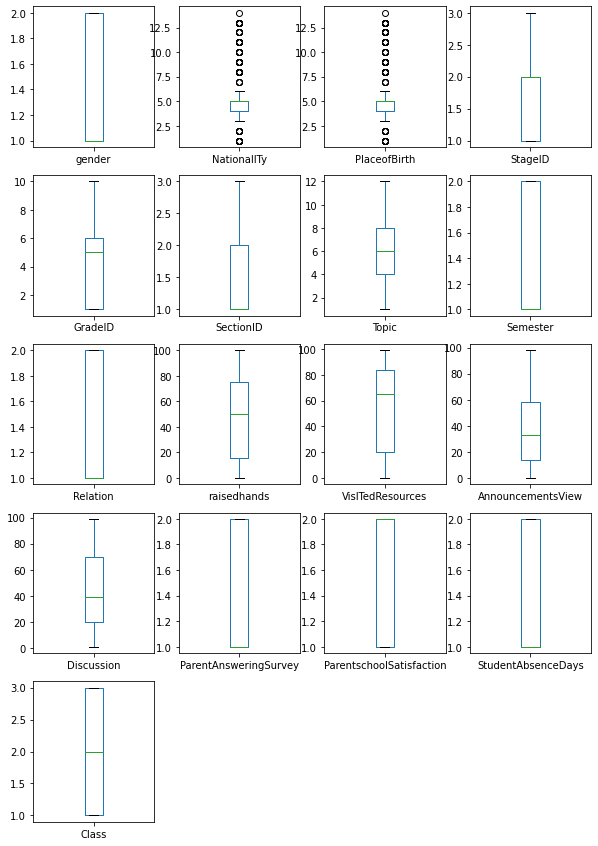

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False) 
pyplot.rcParams["figure.figsize"] = 9,9
pyplot.show()

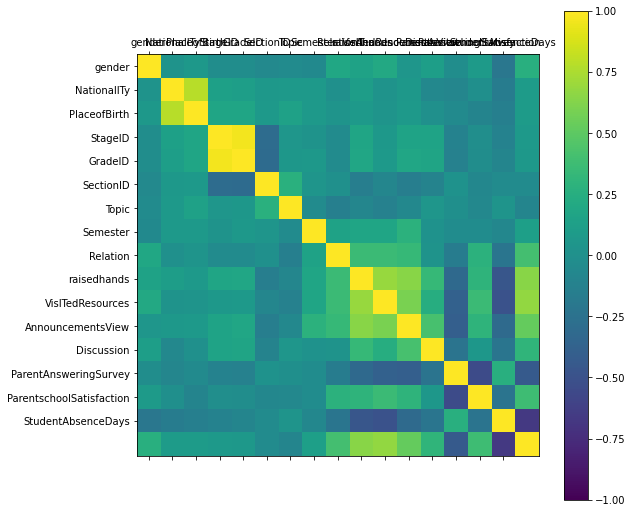

In [ ]:
import numpy
correlations = df.corr()
# plot correlation matrix
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays','Class']
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.rcParams["figure.figsize"] = 15,15
pyplot.show()


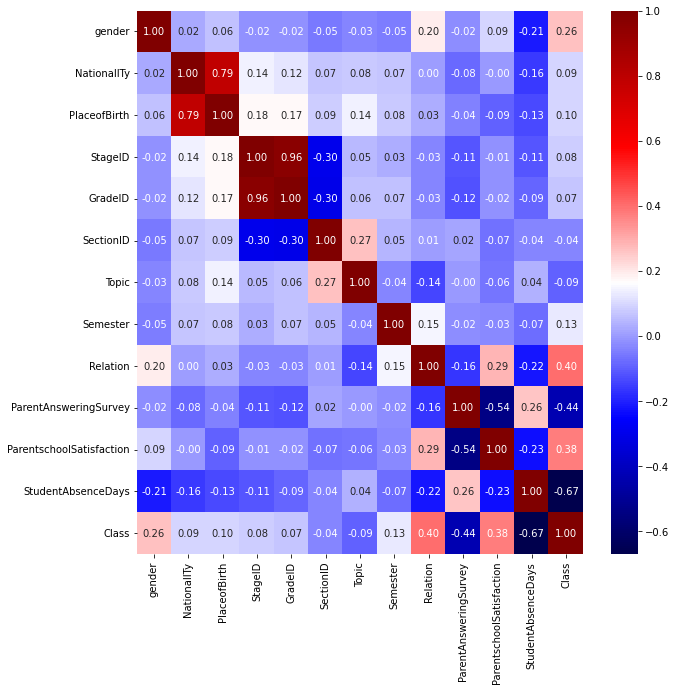

In [ ]:
fig = pyplot.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='seismic')

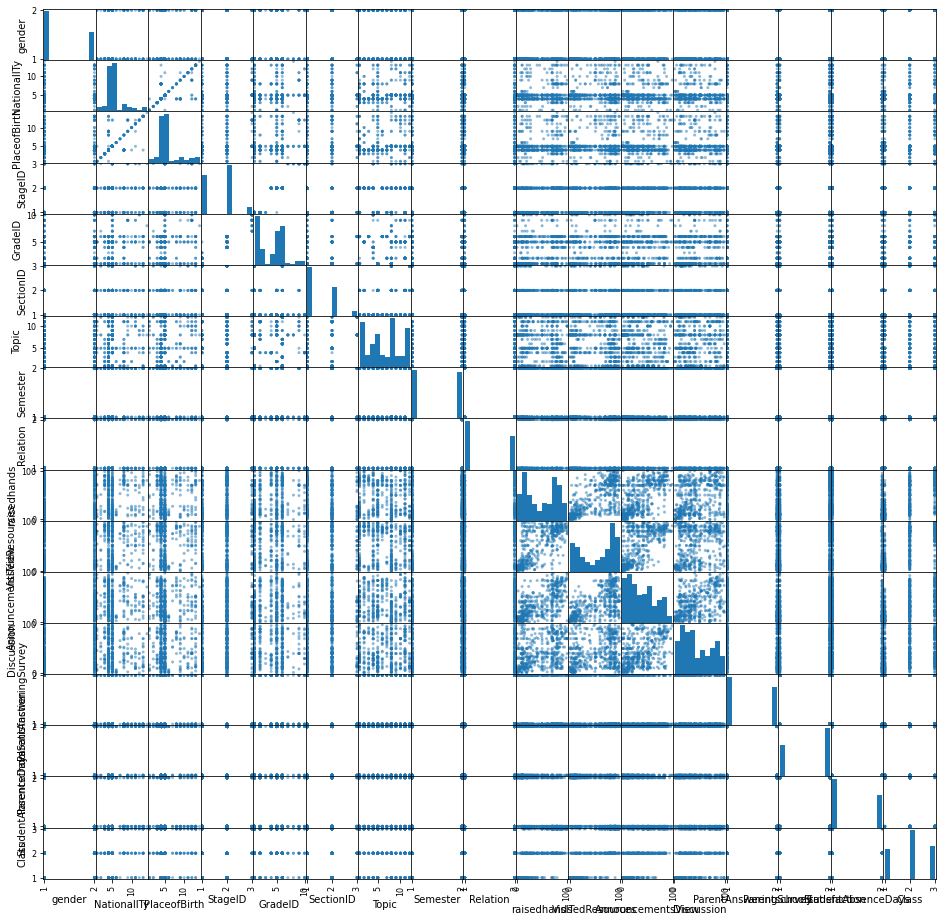

In [ ]:
from pandas.plotting import scatter_matrix
df = dataset[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays','Class']]
scatter_matrix(df,alpha=0.5,figsize=(16,16));

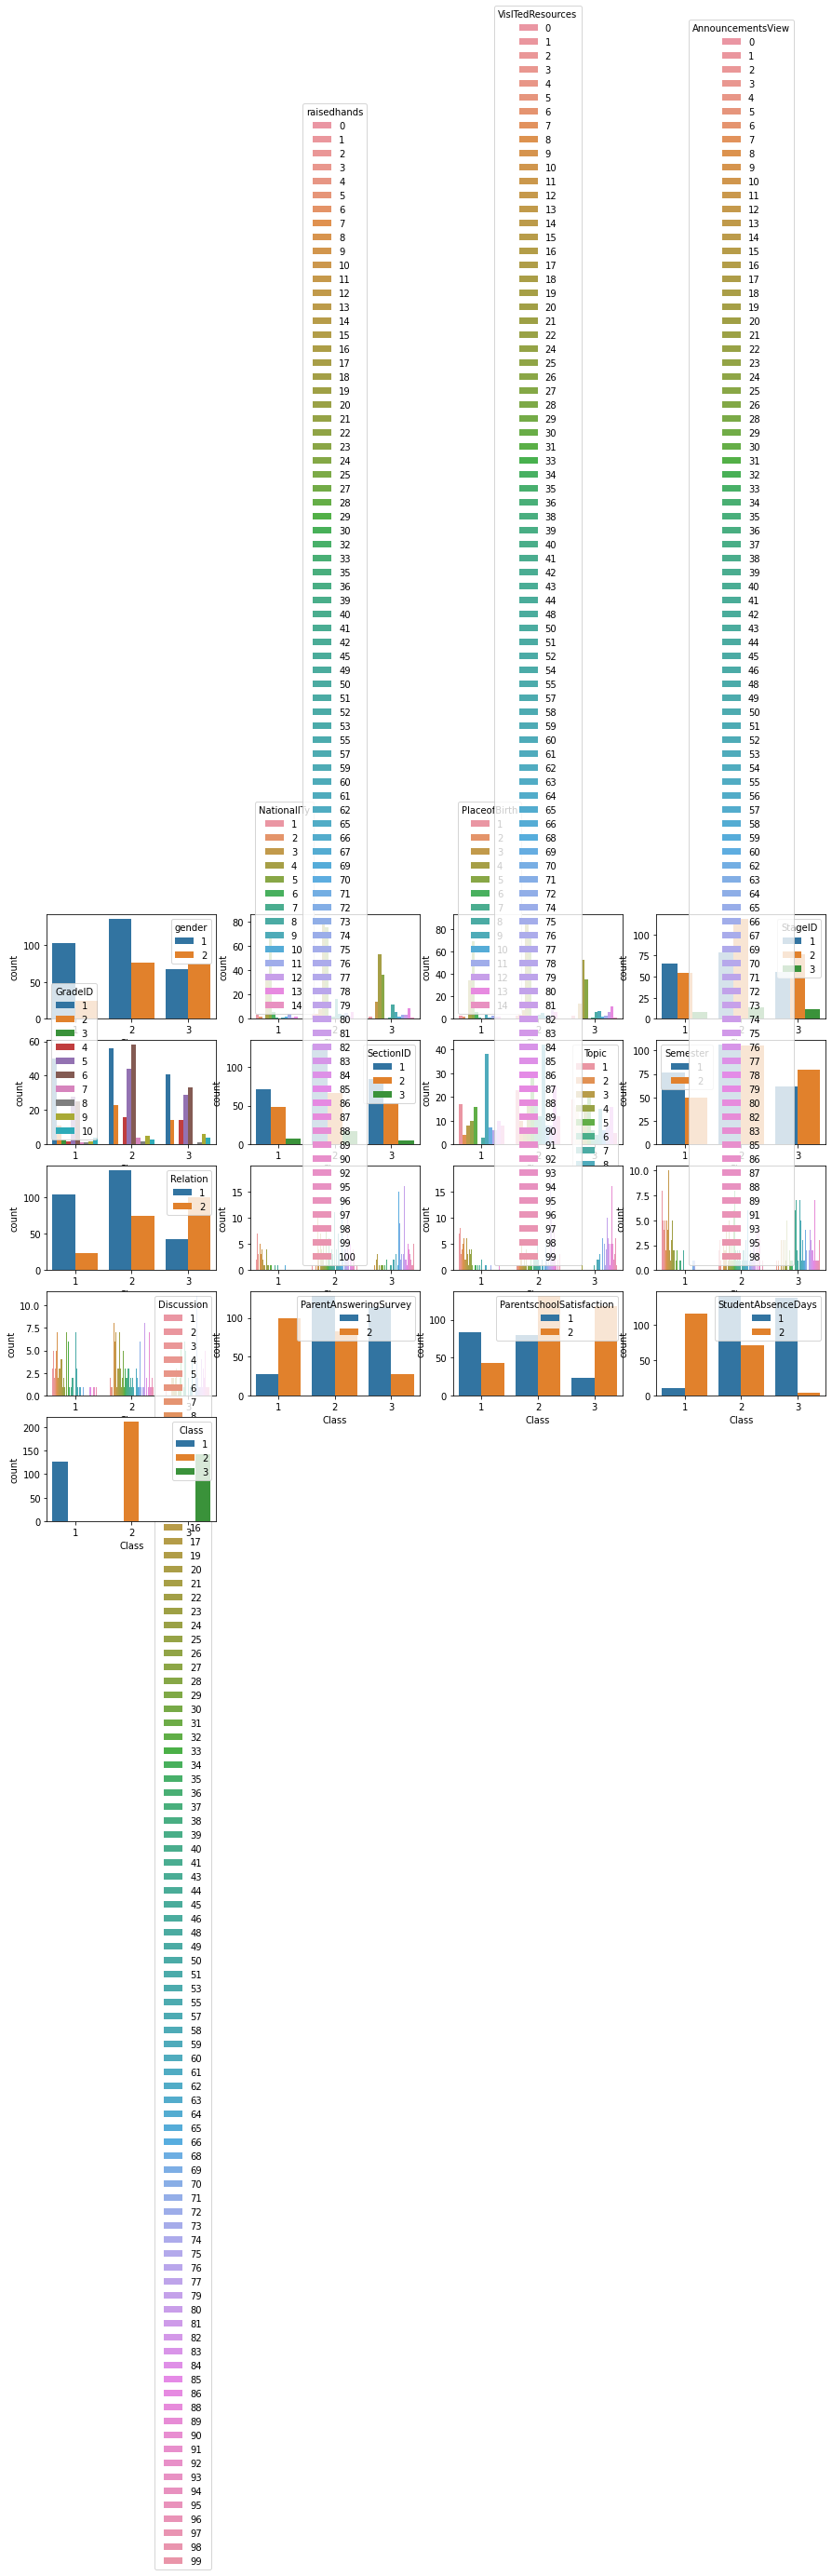

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
#df = df_new.drop(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class'], axis = 1)
df = df_new
for i, column in enumerate (df):
    plt.subplot(5,4,i+1)
    sns.countplot(x=df_new.Class, hue=df[column]);

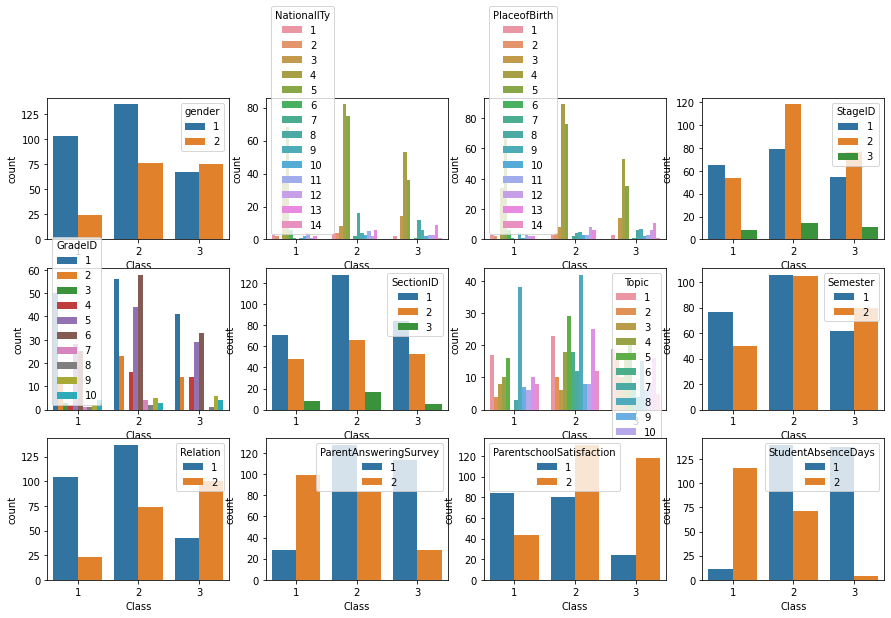

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
df = df_new.drop(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class'], axis = 1)

for i, column in enumerate (df):
    plt.subplot(4,4,i+1)
    sns.countplot(x=df_new.Class, hue=df[column]);

In [ ]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

array_attr = df_new.values
X = array_attr[:,0:16]
Y = array_attr[:,16]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[5.658e+00 5.654e+00 7.950e+00 1.107e+00 5.347e+00 1.656e-01 1.168e+01
 1.312e+00 1.396e+01 4.125e+03 4.701e+03 2.619e+03 8.093e+02 1.633e+01
 1.014e+01 3.860e+01]
[[15 16  2 20]
 [20 20  3 25]
 [10  7  0 30]
 [30 25  5 35]
 [40 50 12 50]]


In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays','Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
# feature extraction
model = LogisticRegression()
rfe = RFE(model,n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 4
Selected Features: [ True False False False False False False False  True False False False
 False  True False  True]
Feature Ranking: [ 1  6  7  5 13  4  8  3  1  9 11 10 12  1  2  1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

df =  read_csv('/gdrive/My Drive/Colab Notebooks/CSE704 Project/xAPI-Edu-Data.csv')
dataset = df.loc[:, ['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class']]
dataset.gender = [1 if i == "M" else 0 for i in dataset.gender]
df_new = dataset[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class']]
array_attr = df_new.values
X_attr = array_attr[:,0:4]
Y_attr = array_attr[:,4]
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = SVC()
results = cross_val_score(model, X_attr, Y_attr, cv=kfold)
print(results.mean())

0.6625


PCA Components
[[ 0.575  0.609  0.459  0.295]
 [-0.125 -0.41   0.124  0.895]
 [-0.477  0.667 -0.484  0.306]
 [ 0.653 -0.128 -0.735  0.134]]
Explained Variance:
[2261.622  664.308  312.886  274.834]


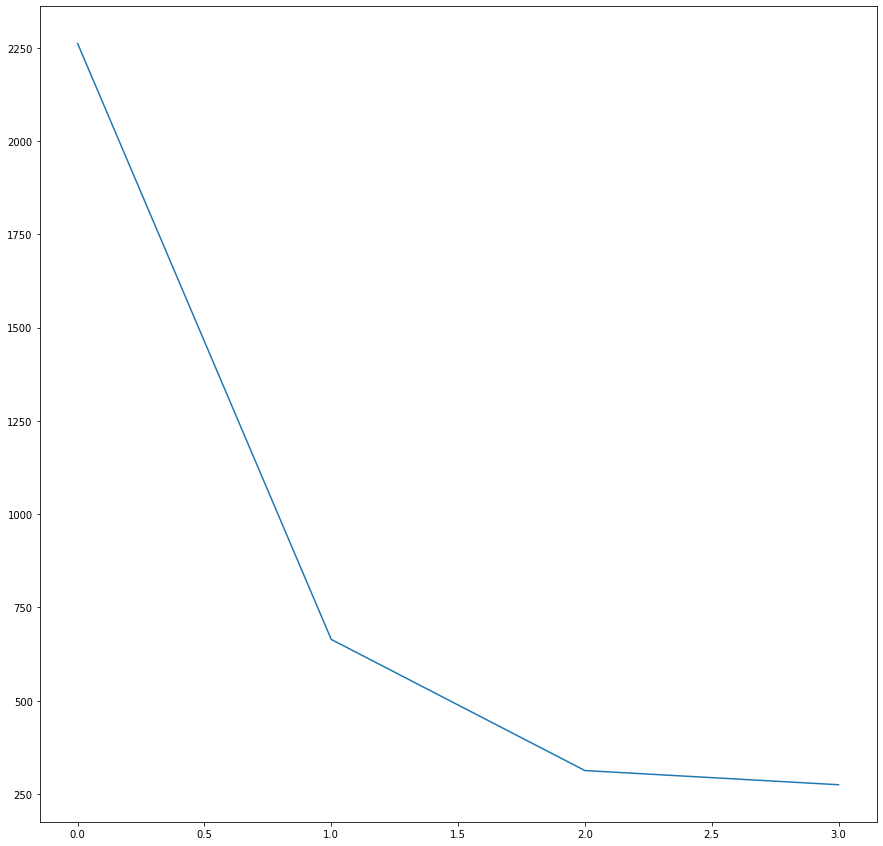

In [ ]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

df =  read_csv('/gdrive/My Drive/Colab Notebooks/CSE704 Project/xAPI-Edu-Data.csv')
dataset = df.loc[:, ['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
dataset.gender = [1 if i == "M" else 0 for i in dataset.gender]
df_new = dataset[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]

# define a matrix
A = df_new.values
pca = PCA(4)
# fit on data
pca.fit(A)
# access values and vectors
print("PCA Components")
print(pca.components_)
print("Explained Variance:")
print(pca.explained_variance_)
plt.plot(pca.explained_variance_);

In [ ]:
import pandas as pd
import numpy as np
#data = data.drop(0)
data = np.array(data, dtype = np.int)
df_new = pd.DataFrame(data)
df_new.columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
print(df_new)

     gender  NationalITy  ...  StudentAbsenceDays  Class
0         1            5  ...                   1      2
1         1            5  ...                   1      2
2         1            5  ...                   2      1
3         1            5  ...                   2      1
4         1            5  ...                   2      2
..      ...          ...  ...                 ...    ...
475       2            4  ...                   2      1
476       2            4  ...                   1      2
477       2            4  ...                   1      2
478       2            4  ...                   2      1
479       2            4  ...                   2      1

[480 rows x 17 columns]


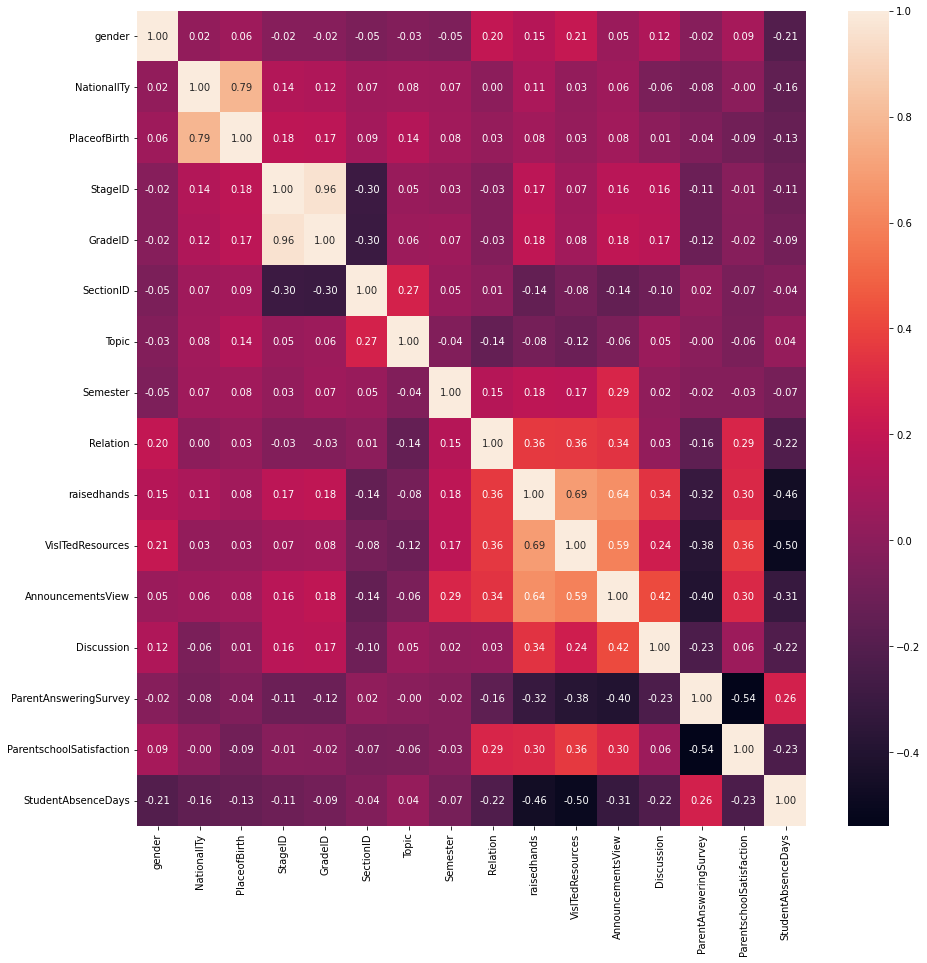

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.loc[:,['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']]
Y = df_new.Class
trainX,testX,trainY,testY = train_test_split(X,Y,random_state=1)
sns.heatmap(X.corr(),annot=True,fmt=".2f")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(trainX,trainY)
predY = model.predict(testX)
print('ACCURACY SCORE:\n' + str(accuracy_score(testY,predY)*100)+'%')

ACCURACY SCORE:
72.5%


In [ ]:
# SVM Classification
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from numpy import nan
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

X = df_new.loc[:,['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class']]

names = ['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class']

array_attr = X.values
X_attr = array_attr[:,0:5]
Y_attr = array_attr[:,5]
kfold = KFold(n_splits=10,shuffle=True,random_state=7)
model = SVC()
results = cross_val_score(model, X_attr, Y_attr, cv=kfold)
print(results.mean())

0.6458333333333333


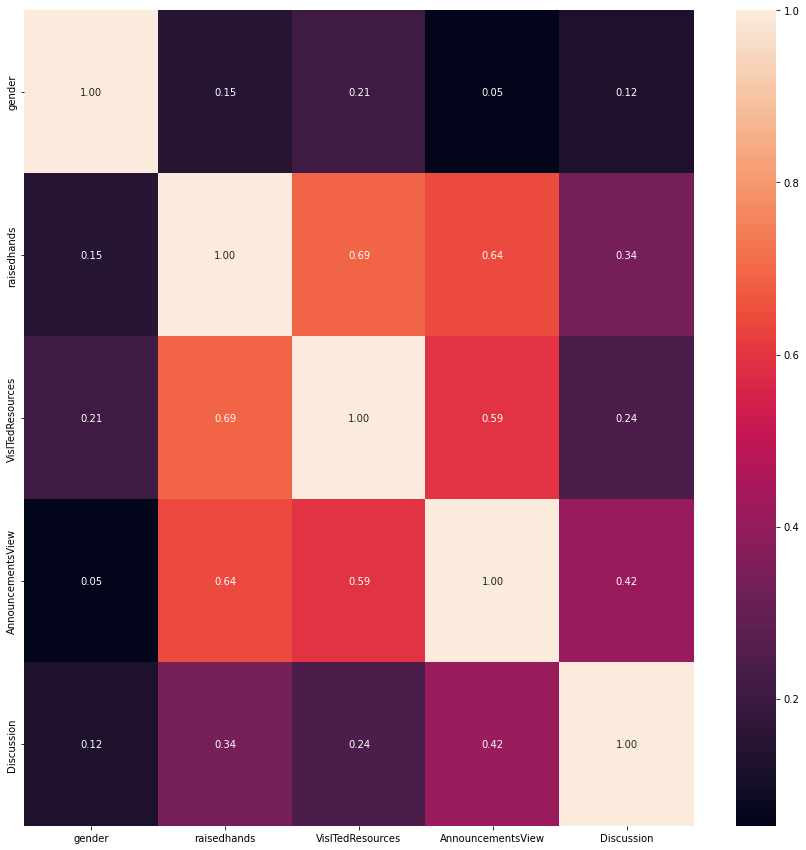

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.loc[:,['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
Y = df_new.Class
trainX,testX,trainY,testY = train_test_split(X,Y,random_state=1)
sns.heatmap(X.corr(),annot=True,fmt=".2f")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(trainX,trainY)
predY = model.predict(testX)
print('ACCURACY SCORE:\n' + str(accuracy_score(testY,predY)*100)+'%')

ACCURACY SCORE:
68.33333333333333%


In [ ]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
num_folds = 10
kfold = KFold(n_splits=10,shuffle=True,random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.73125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# LDA Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7458333333333333


In [ ]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
num_folds = 10
kfold = KFold(n_splits=10,shuffle=True,random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6291666666666667


In [ ]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
kfold = KFold(n_splits=10, shuffle=True,random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.7229166666666668


In [ ]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
kfold = KFold(n_splits=10, shuffle=True,random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7145833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.731250 (0.045118)
LDA: 0.745833 (0.045453)
KNN: 0.629167 (0.074419)
CART: 0.706250 (0.042133)
NB: 0.722917 (0.048457)
SVM: 0.614583 (0.056095)


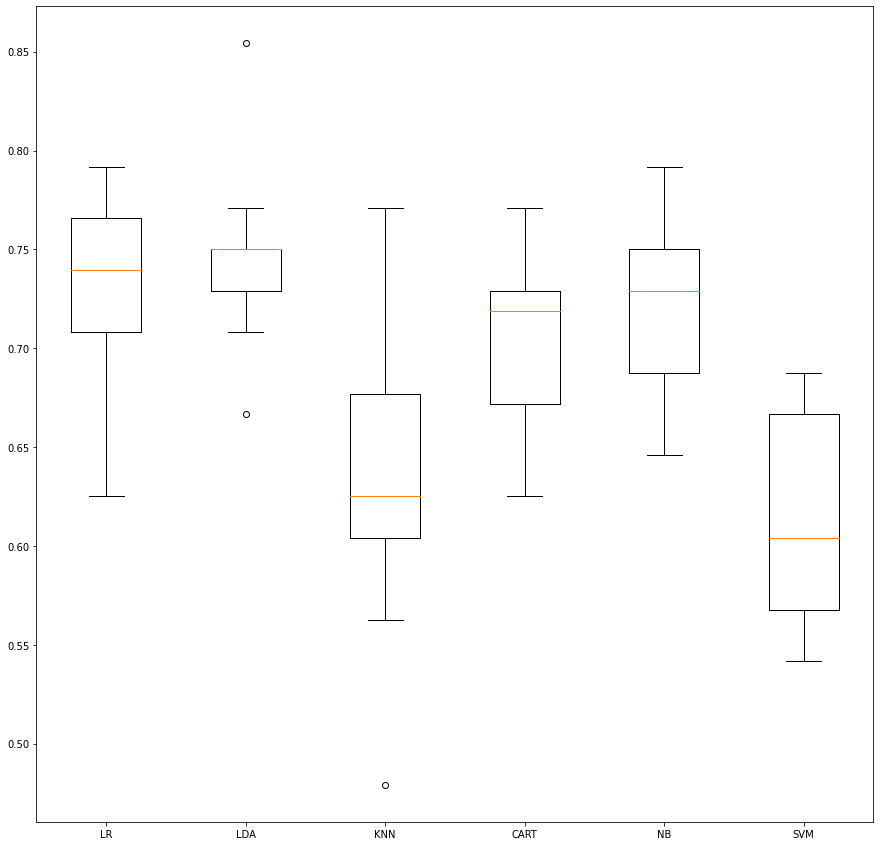

In [ ]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

names = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
array = df_new.values
X = array[:,0:16]
Y = array[:,16]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = ("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
#fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.loc[:,['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
         'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  
         'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays',]]
Y = df_new.Class
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20)
from sklearn.svm import SVC
LA = LinearDiscriminantAnalysis()
LA.fit(X_train, y_train)
y_pred = LA.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  1  0]
 [ 4 27 11]
 [ 0  9 21]]
              precision    recall  f1-score   support

           1       0.85      0.96      0.90        24
           2       0.73      0.64      0.68        42
           3       0.66      0.70      0.68        30

    accuracy                           0.74        96
   macro avg       0.75      0.77      0.75        96
weighted avg       0.74      0.74      0.74        96



In [ ]:
# Make predictions on validation dataset
seed = 7
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation) 
print(accuracy_score(Y_validation, predictions)) 
print(confusion_matrix(Y_validation, predictions)) 
print(classification_report(Y_validation, predictions))

0.8020833333333334
[[27  1  0]
 [ 5 24  6]
 [ 0  7 26]]
              precision    recall  f1-score   support

           1       0.84      0.96      0.90        28
           2       0.75      0.69      0.72        35
           3       0.81      0.79      0.80        33

    accuracy                           0.80        96
   macro avg       0.80      0.81      0.81        96
weighted avg       0.80      0.80      0.80        96

